In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing

# warning filter
import warnings
warnings.filterwarnings('ignore')

import sqlalchemy # sql connection

#To Traceback error
import traceback

# For calculating Time required to run the model
import time

from tqdm import tqdm

#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from category_encoders import OrdinalEncoder    # Used when you want to provide dictionary    

#train test split
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Scaling Down
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Imputation
from sklearn.impute import KNNImputer

#metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor


### Created.......

In [6]:
pip install learn

In [7]:
# #Use for Handaling Outliers
# from learn.processing import DataPreProcessing

# # For All Regressor Models
# from learn.supervised import Regressor

ModuleNotFoundError: No module named 'learn.processing'; 'learn' is not a package

In [8]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


In [9]:
#Checking Duplicates
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [11]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

### 1. Invoice ID

In [12]:
df['Invoice ID'].value_counts()

750-67-8428    1
642-61-4706    1
816-72-8853    1
491-38-3499    1
322-02-2271    1
              ..
633-09-3463    1
374-17-3652    1
378-07-7001    1
433-75-6987    1
849-09-3807    1
Name: Invoice ID, Length: 1000, dtype: int64

In [13]:
df.drop(columns=['Invoice ID'],axis=1,inplace=True)

### 2. Branch

In [14]:
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [15]:
One_hot_encoder = OneHotEncoder(dtype=int,sparse=False)
One_hot_encoder.fit_transform(df[['Branch']])

array([[1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [16]:
One_hot_encoder.categories_[0]

array(['A', 'B', 'C'], dtype=object)

In [17]:
df1 = pd.DataFrame(One_hot_encoder.fit_transform(df[['Branch']]))
df1.columns= list(map(lambda x:'Branch_'+x,One_hot_encoder.categories_[0].tolist()))

In [18]:
df = pd.concat([df,df1],axis=1)

In [19]:
df.drop(columns=['Branch'],inplace=True)

### 3. City

In [20]:
df['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [21]:
One_hot_encoder = OneHotEncoder(dtype=int,sparse=False)
One_hot_encoder.fit_transform(df[['City']])

array([[0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [22]:
One_hot_encoder.categories_[0]

array(['Mandalay', 'Naypyitaw', 'Yangon'], dtype=object)

In [23]:
df1 = pd.DataFrame(One_hot_encoder.fit_transform(df[['City']]))
df1.columns= list(map(lambda x:'City_'+x,One_hot_encoder.categories_[0].tolist()))

In [24]:
df = pd.concat([df,df1],axis=1)

In [25]:
df.drop(columns=['City'],inplace=True)

### 4. Customer type

In [26]:
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [27]:
values_Customer_type =  {'Normal': 0, 'Member': 1}

In [66]:
values_Customer_type

{'Normal': 0, 'Member': 1}

In [28]:
mapping = [{
    'col': 'Customer type',
    'mapping': values_Customer_type
}]

In [29]:
encoder = OrdinalEncoder(cols=['Customer type'], mapping=mapping)
df['Customer type'] = encoder.fit_transform(df['Customer type'])

### 5. Gender

In [30]:
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [31]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

In [32]:
values_Gender = dict(zip(list(encoder.classes_),list(range(len(encoder.classes_)))))
values_Gender

{'Female': 0, 'Male': 1}

### 6. Product line

In [33]:
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [34]:
One_hot_encoder = OneHotEncoder(dtype=int,sparse=False)
One_hot_encoder.fit_transform(df[['Product line']])

array([[0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0]])

In [35]:
One_hot_encoder.categories_[0]

array(['Electronic accessories', 'Fashion accessories',
       'Food and beverages', 'Health and beauty', 'Home and lifestyle',
       'Sports and travel'], dtype=object)

In [36]:
df1 = pd.DataFrame(One_hot_encoder.fit_transform(df[['Product line']]))
df1.columns= list(map(lambda x:'Product line_'+x,One_hot_encoder.categories_[0].tolist()))

In [37]:
df = pd.concat([df,df1],axis=1)

In [38]:
df.drop(columns=['Product line'],inplace=True)

### 7. Date and Time

In [39]:
df.drop(columns=['Date','Time'],inplace=True)

### 8. Payment

In [40]:
df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [41]:
One_hot_encoder = OneHotEncoder(dtype=int,sparse=False)
One_hot_encoder.fit_transform(df[['Payment']])

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [42]:
One_hot_encoder.categories_[0]

array(['Cash', 'Credit card', 'Ewallet'], dtype=object)

In [43]:
df1 = pd.DataFrame(One_hot_encoder.fit_transform(df[['Payment']]))
df1.columns= list(map(lambda x:'Payment_'+x,One_hot_encoder.categories_[0].tolist()))

In [44]:
df = pd.concat([df,df1],axis=1)

In [45]:
df.drop(columns=['Payment'],inplace=True)

### 9. gross margin percentage

In [46]:
df['gross margin percentage'].value_counts()

4.761905    1000
Name: gross margin percentage, dtype: int64

In [47]:
df.drop(columns=['gross margin percentage'],inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Customer type                        1000 non-null   int32  
 1   Gender                               1000 non-null   int32  
 2   Unit price                           1000 non-null   float64
 3   Quantity                             1000 non-null   int64  
 4   Tax 5%                               1000 non-null   float64
 5   Total                                1000 non-null   float64
 6   cogs                                 1000 non-null   float64
 7   gross income                         1000 non-null   float64
 8   Rating                               1000 non-null   float64
 9   Branch_A                             1000 non-null   int32  
 10  Branch_B                             1000 non-null   int32  
 11  Branch_C                       

# Binning

In [49]:
min_val = int(df['Rating'].min())
min_val

max_val = int(df['Rating'].max())
max_val

cut_points = [5]

break_points = [min_val] + cut_points + [max_val]
break_points

[4, 5, 10]

In [50]:
df['Rating'] = pd.cut(df['Rating'], bins=break_points, labels=['Satisfied','Not Satisfied'], include_lowest=True)

In [51]:
df['Rating'].value_counts()

Not Satisfied    826
Satisfied        174
Name: Rating, dtype: int64

In [52]:
encoder = LabelEncoder()
df['Rating'] = encoder.fit_transform(df['Rating'])

In [53]:
values_Rating = dict(zip(list(encoder.classes_),list(range(len(encoder.classes_)))))
values_Rating

{'Not Satisfied': 0, 'Satisfied': 1}

# SMOTE

In [54]:
target_column = "Rating"

In [55]:
x = df.drop(target_column,axis=1)
y = df[target_column]

In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
sm = SMOTE(random_state=77)
x, y = sm.fit_resample(x,y)

In [58]:
x.shape

(1652, 23)

In [59]:
x.duplicated().sum()

0

# Outliers Handaling

<AxesSubplot:>

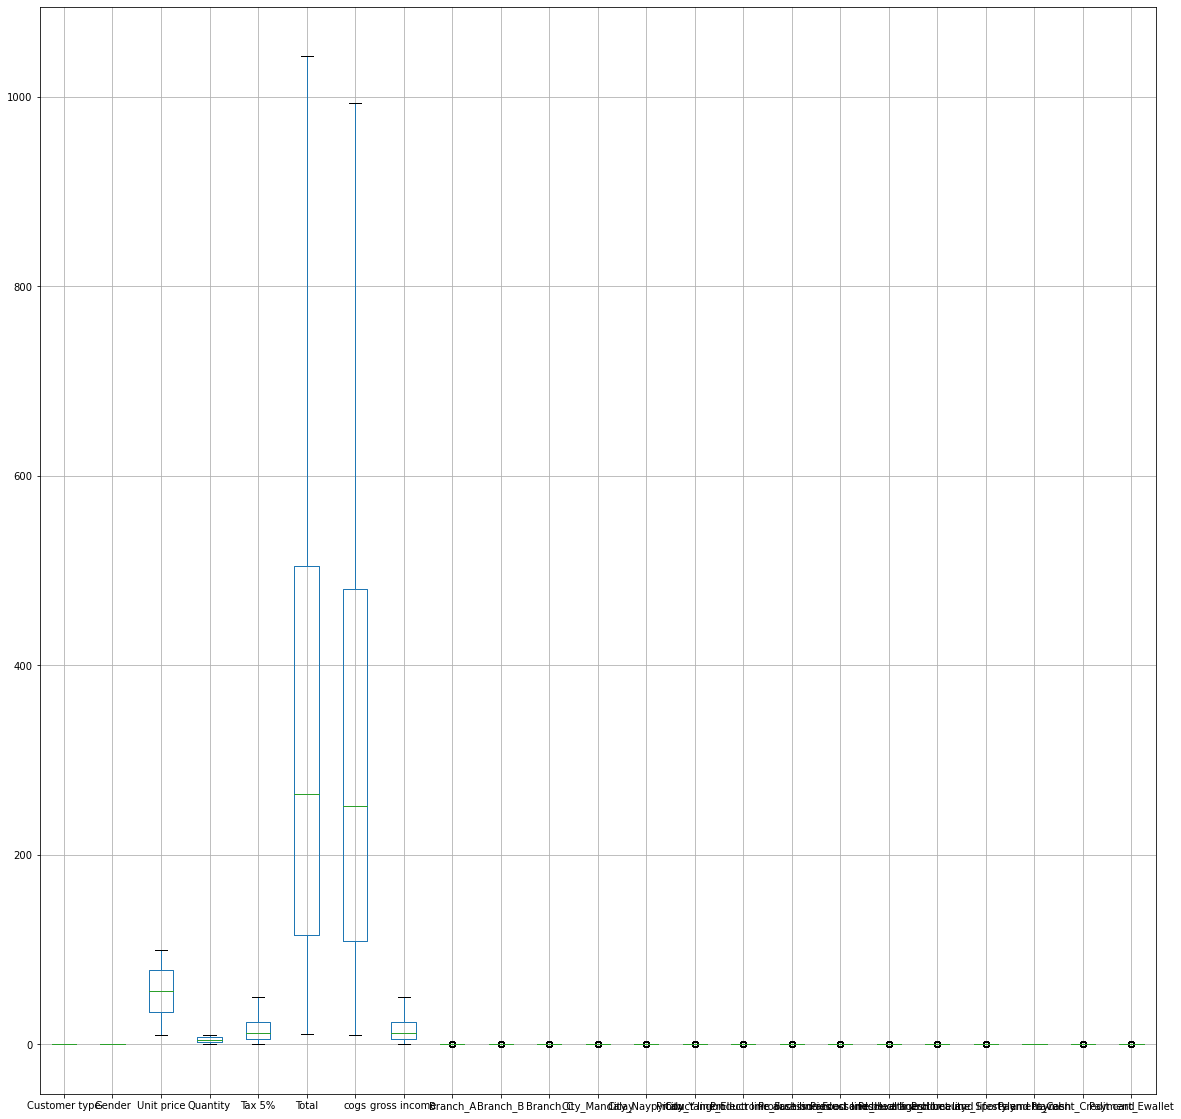

In [60]:
plt.figure(figsize=(20,20))
x.boxplot()

### Tax 5%

<AxesSubplot:xlabel='Tax 5%'>

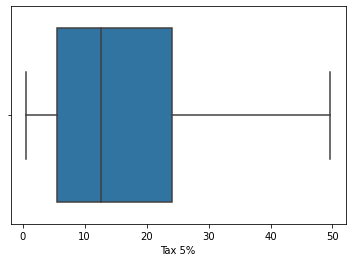

In [61]:
sns.boxplot(x['Tax 5%'])

### Total

<AxesSubplot:xlabel='Total'>

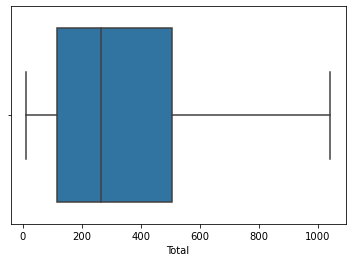

In [62]:
sns.boxplot(x['Total'])

### cogs

<AxesSubplot:xlabel='cogs'>

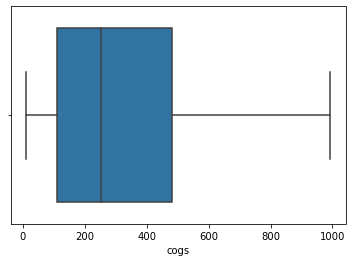

In [63]:
sns.boxplot(x['cogs'])

### gross income

<AxesSubplot:xlabel='gross income'>

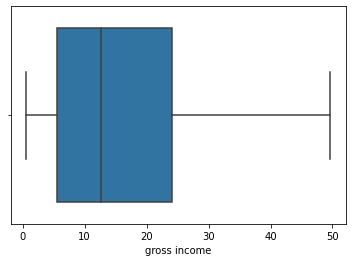

In [64]:
sns.boxplot(x['gross income'])

In [65]:
# Create Instance
preprocessing = DataPreProcessing()

NameError: name 'DataPreProcessing' is not defined

In [ ]:
x = preprocessing.replace_outliers_by_nan(x,outlier_columns=['Tax 5%','Total','cogs','gross income'])

In [ ]:
plt.figure(figsize=(20,20))
x.boxplot()

In [ ]:
x = preprocessing.knn_imputer(x,continuous_columns = ['Tax 5%','Total','cogs','gross income'])

In [ ]:
x.columns

# Feature Selection

In [ ]:
x.head(2)

In [ ]:
continuous_columns = ['Unit price','Tax 5%','Total','cogs','gross income']
catogorical_columns = ['Customer type', 'Gender','Quantity', 'Branch_A', 'Branch_B', 'Branch_C',
       'City_Mandalay', 'City_Naypyitaw', 'City_Yangon',
       'Product line_Electronic accessories',
       'Product line_Fashion accessories', 'Product line_Food and beverages',
       'Product line_Health and beauty', 'Product line_Home and lifestyle',
       'Product line_Sports and travel', 'Payment_Cash', 'Payment_Credit card',
       'Payment_Ewallet']

### 0. correlation 

In [ ]:
 pd.concat([x,y],axis=1).corr('kendall').tail(1)

In [ ]:
 pd.concat([x,y],axis=1).corr('spearman').tail(1)

### 1. chi-square test

In [ ]:
from sklearn.feature_selection import chi2

In [ ]:
test_statistics, p_value = chi2(x[catogorical_columns],y)

In [ ]:
pd.Series(p_value, index=catogorical_columns)

## 2. ANOVA

In [ ]:
from sklearn.feature_selection import f_classif

In [ ]:
test_statistics, p_value = f_classif(x[continuous_columns],y)

In [ ]:
pd.Series(p_value, index=continuous_columns)

### 3. Mutual information (Information Gain)

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
array = mutual_info_classif(x,y,random_state = 10)

In [ ]:
s2 = pd.Series(array, index=x.columns)
s2.sort_values().plot(kind= 'barh')

### 2.1 . Exhaustive Feature Selection

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.tree import DecisionTreeClassifier

In [ ]:
efs = ExhaustiveFeatureSelector(DecisionTreeClassifier(), min_features=19, max_features=20, cv=5, n_jobs=-1)
efs.fit(x,y)

In [ ]:
pd.DataFrame(efs.subsets_).T

### 2.2 Recursive Feature Elimination

In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.tree import DecisionTreeClassifier

# dt_model = DecisionTreeClassifier()

# rfe = RFE(dt_model, n_features_to_select=15)
# rfe.fit(x,y)
# x = x[rfe.get_feature_names_out()]

In [ ]:
x.shape

### SVM

In [ ]:
from sklearn.svm import SVC
# Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
x1 = x[['Unit price','Quantity','Tax 5%','Total','cogs','gross income']]

std_scalar = MinMaxScaler()
array = std_scalar.fit_transform(x1)

x1 = pd.DataFrame(array, columns=x1.columns)
x1

In [ ]:
x.shape

In [ ]:
for i in ['Unit price','Quantity','Tax 5%','Total','cogs','gross income']:
    x[i] = x1[i]

In [ ]:
x.shape

In [ ]:
# target_column = "Rating"

In [ ]:
# x = df.drop(target_column,axis=1)
# y = df[target_column]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.30, random_state=10, stratify=y)

In [ ]:
x_train.shape

In [ ]:
svm_clf = SVC()
svm_clf.fit(x_train, y_train)

In [ ]:
# Testing Accuracy

y_pred = svm_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_pred, y_test)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*55)

accuracy = accuracy_score(y_pred, y_test)
print("Accuracy Score:",accuracy)
print("*"*55)


clf_report = classification_report(y_pred, y_test)
print("Classification report:\n", clf_report)

In [ ]:
# Training Accuracy

y_pred_train = svm_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_pred_train, y_train)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*55)

accuracy = accuracy_score(y_pred_train, y_train)
print("Accuracy Score:",accuracy)
print("*"*55)


clf_report = classification_report(y_pred_train, y_train)
print("Classification report:\n", clf_report)

# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(random_state=7)

In [ ]:
model.fit(x_train,y_train)

In [ ]:
model.score(x_train,y_train)

In [ ]:
model.score(x_test,y_test)

In [ ]:
model.feature_importances_

In [ ]:
pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)

### GridSearchCV 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_model = GridSearchCV(RandomForestClassifier(),param_grid={'n_estimators':np.arange(98,102),
                                "criterion":["gini", "entropy"],
                                'max_depth':np.arange(3,5),
                                'min_samples_split': np.arange(5,7),
                                'min_samples_leaf':np.arange(2,4),
                                'max_features':['sqrt','log2']})
grid_model.fit(x_train,y_train)

In [ ]:
gscv = grid_model.best_estimator_
gscv

In [ ]:
gscv.fit(x_train,y_train)

In [ ]:
gscv.score(x_train,y_train)

In [ ]:
gscv.score(x_test,y_test)

### Customers Point of View

In [ ]:
# Columns:-
1. Service by Mart (Rating)
2. Parking (Parking Available/Not)
3. Location
4. Lift
5. Transportations
6. Discount are available (Yes/ No)
7. Quality of Products
8. Number of Visits
9. Source of Visit (word of mouth, Advertisement,Social media)
10. Hygiene
11. All Payment Facilities are available (Yes/Not)
12. replacment policy
13. 

### Mart Point of View

In [ ]:
1. 

In [ ]:
pd.read_csv('supermarket_sales - Sheet1.csv')

In [ ]:
s = [20,20,15,18,20,18,16,19]
y = [19,18,19,19,19,17,18,17]

In [ ]:
np.var(s)

In [ ]:
np.var(y)

In [70]:
x.head(1).T

,0
Customer type,1.0000
Gender,0.0000
Unit price,74.6900
Quantity,7.0000
Tax 5%,26.1415
Total,548.9715
cogs,522.8300
gross income,26.1415
Branch_A,1.0000
Branch_B,0.0000


In [ ]:
Customer type	1.0000
Gender	0.0000
Unit price	74.6900
Quantity	7.0000
Tax 5%	26.1415
Total	548.9715
cogs	522.8300
gross income	26.1415
Branch_A	1.0000
Branch_B	0.0000
Branch_C	0.0000
City_Mandalay	0.0000
City_Naypyitaw	0.0000
City_Yangon	1.0000
Product line_Electronic accessories	0.0000
Product line_Fashion accessories	0.0000
Product line_Food and beverages	0.0000
Product line_Health and beauty	1.0000
Product line_Home and lifestyle	0.0000
Product line_Sports and travel	0.0000
Payment_Cash	0.0000
Payment_Credit card	0.0000
Payment_Ewallet	1.0000
1
​